# Taxi Pricing - Exploratory Data Analysis

#### Questions to be answered
- Which time of the day the most trips were taken?
- How does the base fare changes during the day? 
- What is the demand for long distance taxi trips?

#### Description of the dataset
The dataset, taxi_trip_pricing.csv, contains all the information about taxi trips taken. This dataset contains 11 fields, that provides detailed insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as pplt 
import seaborn as sns

%matplotlib inline

sns.set_theme(style= 'white')

>   Now that, all of the necessary libraries for this analysis are imported, we can start by loading the dataset into pandas DataFrame.

In [3]:
dF = pd.read_csv('taxi_trip_pricing.csv', encoding='latin-1')

dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


> This dataset contains 1,000 rows and non-null count is 950. Therefore, We need to clean the data before analyising.

#### Data Cleaning
Before diving deep into analysis, we have to firstly tidy up the data to come towards best conclusion.

In [4]:
# Let's see the count of NaN values in each columns in the dataset.
dF.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [5]:
# In order to keep the cleaning process simple, we will just do dropna() to remove all rows with NaN values.
dF.dropna().count()


Trip_Distance_km         562
Time_of_Day              562
Day_of_Week              562
Passenger_Count          562
Traffic_Conditions       562
Weather                  562
Base_Fare                562
Per_Km_Rate              562
Per_Minute_Rate          562
Trip_Duration_Minutes    562
Trip_Price               562
dtype: int64

In [6]:
dF = dF.dropna()
dF.shape

(562, 11)

> Just like that, the DataFrame has no rows with NaN values now.

#### Data Visualisation

In [7]:
dF.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,27.772941,2.533808,3.509893,1.219858,0.288221,61.825089,57.663525
std,21.153175,1.108915,0.871082,0.430351,0.114834,32.128436,43.958741
min,1.270000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.135000,2.000000,2.722500,0.840000,0.190000,36.530000,33.583875
50%,26.420000,3.000000,3.545000,1.200000,0.280000,61.210000,50.157850
75%,38.827500,4.000000,4.260000,1.580000,0.387500,88.435000,69.146575
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


> The pricing for taxi trips tend to have a wider spread due to its high standard deviation.

##### Question 1

In [8]:
countTrip= dF['Day_of_Week'].groupby(dF['Time_of_Day']).count()
countTrip

Time_of_Day
Afternoon    220
Evening      124
Morning      157
Night         61
Name: Day_of_Week, dtype: int64

In [9]:
#percentage of trips in the afternoon in the whole data
(countTrip['Afternoon']/dF.shape[0])*100

39.14590747330961

> We can see that almost 40% of the trips were taken in the afternoon. That would be the result of majority of people running their errands in the afternoon.

##### Question 2

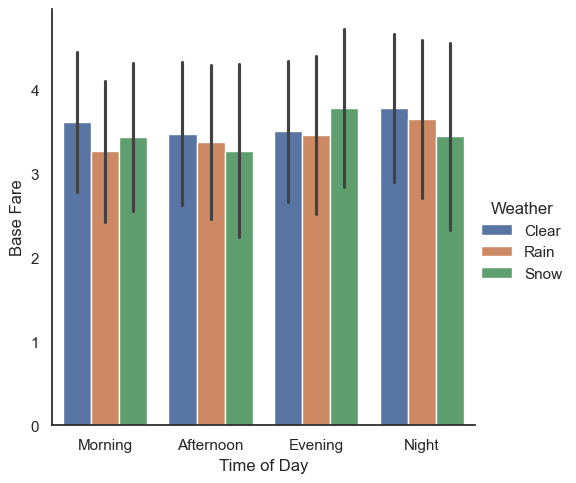

In [10]:
fig = sns.catplot(kind= 'bar', x= dF['Time_of_Day'], y=dF['Base_Fare'], hue= dF['Weather'], errorbar= 'sd', order= ['Morning', 'Afternoon', 'Evening', 'Night'])
fig.set_xlabels('Time of Day')
fig.set_ylabels('Base Fare')
pplt.show()

> The bar plot above shows that the earlier times and nighttime of the day has slightly higher base fare than the rest of the day. This correlation also changes according to the weather conditions as shown by the plot above.

##### Question 3

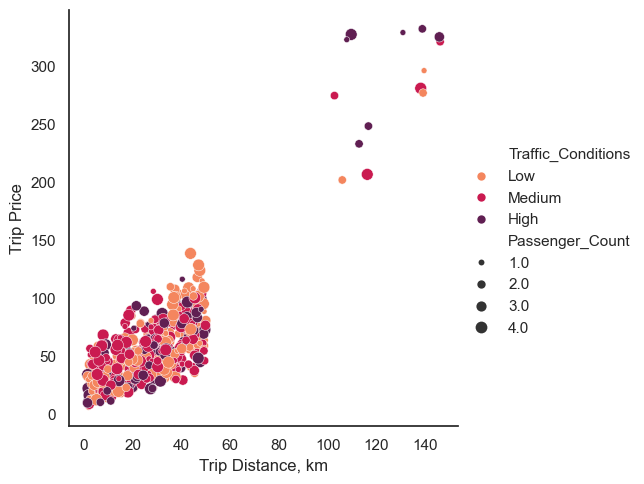

In [11]:
fig1 = sns.relplot(x= dF['Trip_Distance_km'], y= dF['Trip_Price'], hue= dF['Traffic_Conditions'], size= dF['Passenger_Count'], palette= 'rocket_r', hue_order= ['Low', 'Medium', 'High'], legend= True)
fig1.set_xlabels('Trip Distance, km')
fig1.set_ylabels('Trip Price')
pplt.show()

In [12]:
dF['Passenger_Count'].value_counts()

Passenger_Count
2.0    150
4.0    146
3.0    137
1.0    129
Name: count, dtype: int64

> While there are some trips over 100km, there is no demand for between 50 and 100 km trips, suprisingly. For, these over 100km trips, the number of passengers is usually two or more.

#### Conclusion & Summary

> The taxi trip price tends to have higher standard deviation(more wider spread) as the trip distance increases.

> Majority of people just prefer shorter distance taxi trips.

> The traffic condition for most of the trips is medium.

>